In [28]:
import pandas as pd 
from sklearn import preprocessing
import numpy as np
import cv2
import skimage.io
import matplotlib.pyplot as plt
import PIL.Image
import time
import os
from skimage.transform import rescale, resize, downscale_local_mean
from random import uniform

In [2]:
data_car = pd.read_csv("driving_log.csv", na_values = ['no info', '.'])
#data_car = pd.read_csv("interpolated.csv", na_values = ['no info', '.'])
# Data presentation
data_car.head()

,dir_center,dir_left,dir_right,angle,torque,acc,speed
0,IMG/center_2018_11_20_17_12_32_757.jpg,IMG/left_2018_11_20_17_12_32_757.jpg,IMG/right_2018_11_20_17_12_32_757.jpg,0.00,0.000000,0,7.719079
1,IMG/center_2018_11_20_17_12_32_854.jpg,IMG/left_2018_11_20_17_12_32_854.jpg,IMG/right_2018_11_20_17_12_32_854.jpg,-0.05,0.000000,0,7.653603
2,IMG/center_2018_11_20_17_12_32_945.jpg,IMG/left_2018_11_20_17_12_32_945.jpg,IMG/right_2018_11_20_17_12_32_945.jpg,-0.30,0.090405,0,7.566245
3,IMG/center_2018_11_20_17_12_33_011.jpg,IMG/left_2018_11_20_17_12_33_011.jpg,IMG/right_2018_11_20_17_12_33_011.jpg,-0.45,0.291078,0,7.640279
4,IMG/center_2018_11_20_17_12_33_079.jpg,IMG/left_2018_11_20_17_12_33_079.jpg,IMG/right_2018_11_20_17_12_33_079.jpg,-0.65,0.493290,0,7.938390


In [3]:
# Verificando homegeneidad de los datos de salida
angle_dt = data_car['angle']
print(angle_dt.dtypes)
angle_dt.head()

float64


0    0.00
1   -0.05
2   -0.30
3   -0.45
4   -0.65
Name: angle, dtype: float64

In [4]:
# Normalizando valores de angularidad, normalizando en base al valor positivo mayor
#Y_train = (angle_dt-angle_dt.min())/(angle_dt.max()-angle_dt.min())
Y_train = angle_dt#/abs(angle_dt.min())
print(Y_train.max())
print(Y_train.min())
Y_train.head(5)

1.0
-1.0


0    0.00
1   -0.05
2   -0.30
3   -0.45
4   -0.65
Name: angle, dtype: float64

In [5]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
 
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

def path2array(X_train_path,mini,maxi):
    MAX_ = 200
    MIN_ = 66
    X_train = list()
    #X_0 = skimage.io.imread(X_train_path[0][0])  uniform(1,1.5)
    #X_1 = skimage.io.imread(X_train_path[0][1])
    #X_train = np.append([X_0],[X_1],axis=0) # 225
    for img_path in X_train_path[0][mini:maxi]:
        #print(img_path)
        temp = skimage.io.imread(img_path)[60:-25,:,:]
        temp = cv2.resize(temp,(int(MAX_), int(MIN_)))
        temp = adjust_gamma(temp, uniform(1,1.2))
        temp = adjust_gamma(temp, uniform(0.5,0.9))
        temp = cv2.cvtColor(temp, cv2.COLOR_RGB2YUV)
        X_train.append(temp)
    for img_path in X_train_path[0][mini:maxi]:
        #print(img_path)
        temp = skimage.io.imread(img_path)[60:-25,:,:]
        temp = cv2.resize(temp,(int(MAX_), int(MIN_)))
        temp = adjust_gamma(temp, uniform(0.3,0.6))
        temp = cv2.flip( temp, 1 )
        temp = cv2.cvtColor(temp, cv2.COLOR_RGB2YUV)
        X_train.append(temp)
    for img_path in X_train_path[0][mini:maxi]:
        #print(img_path)
        temp = skimage.io.imread(img_path)[60:-25,:,:]
        temp = cv2.resize(temp,(int(MAX_), int(MIN_)))
        temp = adjust_gamma(temp, uniform(0.5,1.1))
        temp = cv2.GaussianBlur(temp, (3,3), 0)	
        temp = cv2.cvtColor(temp, cv2.COLOR_RGB2YUV)
        X_train.append(temp)
        
        #X_train = np.append(X_train,[skimage.io.imread(img_path)],axis=0)
    X_train = np.array(X_train)
    #X_train.shape
    return X_train
    

In [6]:
#Take data with just belong to the center camera >> Imagenes
#bool_id = np.array(data_car['frame_id']=='center_camera')
#img_center_index = list(np.where(bool_id == True)[0])

#X_train_path = data_car['filename'].iloc[img_center_index]
#X_train_path = np.array(X_train_path)
#X_train_path = pd.DataFrame(X_train_path)
#X_train_path[0].head()

X_train_path = data_car['dir_center']
X_train_path = np.array(X_train_path)
X_train_path = pd.DataFrame(X_train_path)
X_train_path[0].head()

0    IMG/center_2018_11_20_17_12_32_757.jpg
1    IMG/center_2018_11_20_17_12_32_854.jpg
2    IMG/center_2018_11_20_17_12_32_945.jpg
3    IMG/center_2018_11_20_17_12_33_011.jpg
4    IMG/center_2018_11_20_17_12_33_079.jpg
Name: 0, dtype: object

## X_train

(45000, 66, 200, 3)


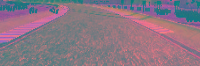

In [7]:
# Convirtiendo las imagenes 2 arrays
minimo = 0
maximo = 15000
#X_train = skimage.io.imread(X_train_path[0][0]) 
X_train = path2array(X_train_path,minimo,maximo)
print(X_train.shape)
#im_test = skimage.io.imread(X_train_path[0][0])
#im_test = cv2.imread(X_train_path[0][500], cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(X_train[1000])

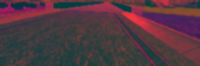

In [19]:
gaussiana = cv2.GaussianBlur(X_train[14000], (3,3), 0)	
canny = cv2.Canny(gaussiana, 10,300)
gamma = adjust_gamma(gaussiana,0.5)
canny = cv2.Canny(gamma, 90,150)
PIL.Image.fromarray(gamma)

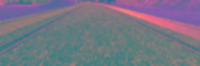

In [20]:
temp = skimage.io.imread('IMG/center_2018_11_20_17_12_32_854.jpg')[60:-25,:,:]
PIL.Image.fromarray(X_train[36000])


In [33]:
# Save file
filename = os.path.join("data/", "{}.npy".format("X_train2"))
np.save(filename,X_train)

## Y_train

In [0]:
#Take data with just belong to the center camera >> Angulos
#Y_train = Y_train.iloc[img_center_index]
Y_train = angle_dt
Y_train_ = np.array(Y_train)
Y_train = np.append(Y_train_[minimo:maximo],-Y_train_[minimo:maximo],axis=0)
Y_train = np.append(Y_train, Y_train_[minimo:maximo],axis=0)
# Save file
filename = os.path.join("data/", "{}.npy".format("Y_train2"))
np.save(filename,Y_train)

In [0]:
Y_train.shape

(45000,)

In [34]:
!sudo chown -R $USER:$USER IMG